In [1]:
pd = '/home/rozenberszki/project/wsnsl/Datasets/Replica/room0_panoptic/depth' 
nd =  '/home/rozenberszki/project/wsnsl/Datasets/Replica/room0/results'

In [2]:
import cv2
import glob
import numpy as np

# Get all depth png files from the directories
pd_files = glob.glob(pd + '/*depth*.png')
nd_files = glob.glob(nd + '/*depth*.png')

# Read the images
pd_images = [cv2.imread(file, cv2.IMREAD_UNCHANGED) for file in pd_files]
nd_images = [cv2.imread(file, cv2.IMREAD_UNCHANGED) for file in nd_files]

# Print the values of one of the depth images
print(pd_images[0])
print(nd_images[0])


[[10120 10115 10115 ... 10070 10075 10075]
 [10170 10170 10170 ... 10125 10130 10130]
 [10215 10225 10220 ... 10185 10185 10185]
 ...
 [ 8635  8635  8635 ...  8620  8620  8620]
 [ 8600  8600  8600 ...  8590  8590  8590]
 [ 8570  8570  8570 ...  8555  8560  8560]]
[[ 9660  9671  9683 ... 16359 16360 16360]
 [ 9661  9672  9683 ... 16427 16428 16429]
 [ 9662  9673  9684 ... 16498 16499 16499]
 ...
 [ 7658  7662  7666 ... 15853 15852 15853]
 [ 7648  7651  7655 ... 15816 15815 15814]
 [ 7637  7640  7644 ... 15779 15779 15778]]


In [7]:
pd_files[0]

'/home/rozenberszki/project/wsnsl/Datasets/Replica/room0_panoptic/depth/depth000050.png'

In [3]:
pd_values = np.array(pd_images)

In [4]:
nd_values = np.array(nd_images)/6553.5

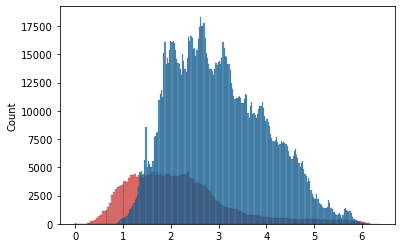

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(pd_values.flatten()[::1000], color='r', alpha = 0.5)
sns.histplot(nd_values.flatten()[::1000])
plt.show()

In [9]:
store_panoptic = '/home/rozenberszki/project/wsnsl/Datasets/Replica/room0_panoptic/results'

In [10]:
for name, value in zip(pd_files, pd_values):
    value = value*6553.5
    cv2.imwrite(store_panoptic + '/' + name.split('/')[-1], value)